In [495]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

!pip install ISLP
from ISLP import load_data
from ISLP.models import ( ModelSpec as MS ,summarize, poly)



#8a. Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summarize() function to print the results.

In [496]:
Auto = load_data("Auto")
Auto.columns
X =  X = pd.DataFrame({'intercept':np.ones(Auto.shape [0]) ,
'horsepower': Auto['horsepower']})
Y = Auto['mpg']
model = sm.OLS(Y, X)
results = model.fit()
summarize(results)




coef  std err       t  P>|t|
intercept   39.9359    0.717  55.660    0.0
horsepower  -0.1578    0.006 -24.489    0.0

# From the results summary we can see that there is a relationship between horsepower and mpg. There is a relationship between the two as the t critical values tells us that we can reject the null hyporthesis of the predictor having a 0 magnitude effect on the outcome variable. However for every 10 unit increase in horsepower the mpg of the car is only predicted to decrease by 1.578 mpg which does show a weak affect that the predictor has on mpg.The relationship between the two is negative.

In [497]:
design = MS(['horsepower'])
design = design.fit(Auto)
X = design.transform(Auto)
model = sm.OLS(Y, X)
new_df = pd.DataFrame ({'horsepower':[98]})
newX = design. transform (new_df)
newX
new_predictions = results. get_prediction (newX);
print(new_predictions.predicted_mean)
print(new_predictions.conf_int(alpha =0.05))


[24.46707715]
[[23.97307896 24.96107534]]


#The predicted mpg at 98 horsepower is 24.467 mpg. With 95% confidence we can say the true value is between 23.973 and 24.961.


#8b - Plot the response and the predictor in a new set of axesax. Use the ax.axline() method or the abline() function defined in the lab to display the least squares regression line.

<ipython-input-498-de519c427683>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params [0],
<ipython-input-498-de519c427683>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params [1],


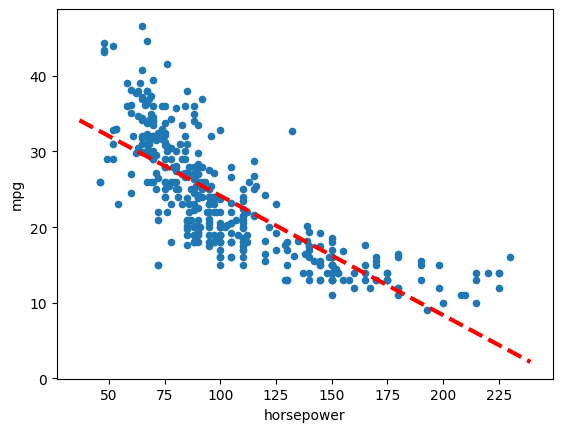

In [498]:
def abline(ax , b, m, *args , ** kwargs):
  "Add a line with slope m and intercept b to ax"
  xlim = ax. get_xlim ()
  ylim = [m * xlim [0] + b, m * xlim [1] + b]
  ax.plot(xlim , ylim , *args , ** kwargs)



ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax ,
       results.params [0],
       results.params [1],
       'r--',
       linewidth =3)


#8c - plot diagnostic plots

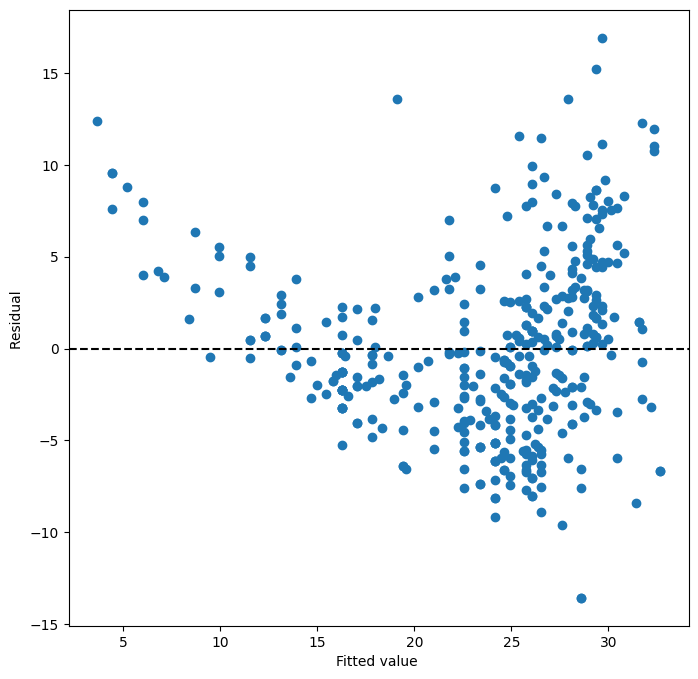

In [499]:
ax = plt.subplots(figsize =(8 ,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax. set_xlabel ('Fitted value ')
ax. set_ylabel ('Residual ')
ax.axhline (0, c='k', ls='--');


115

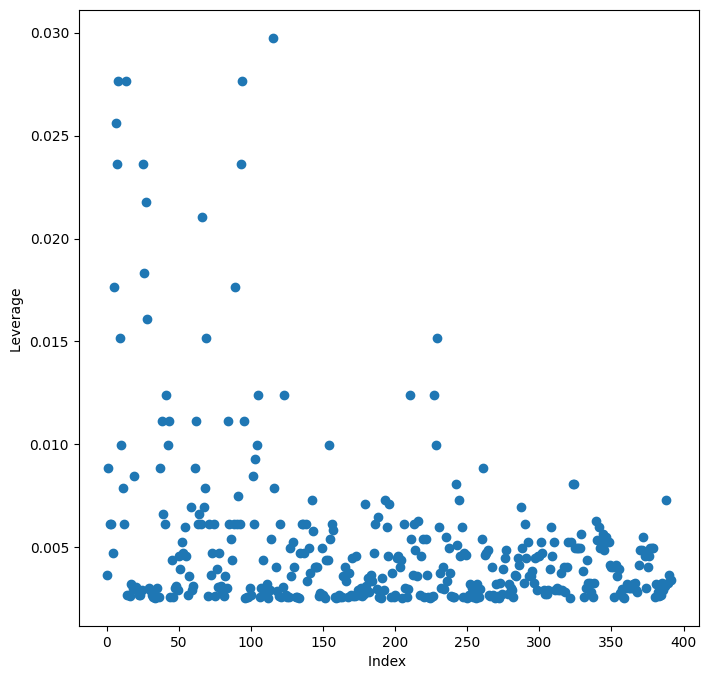

In [500]:
infl = results. get_influence ()
ax = plt.subplots (figsize =(8 ,8))[1]
ax.scatter(np.arange(X.shape [0]) , infl. hat_matrix_diag )
ax. set_xlabel ('Index ')
ax. set_ylabel ('Leverage ')
np.argmax(infl. hat_matrix_diag )

#Residual seems to grow at a higher rate for increase levels of fitted values which can indicate inaccuracy in the relationship and our preductionb model. At lower index levels there is also higher leverage which could also signify more inaccuracy or undefitting of our line.

#9a - Produce a scatterplot matrix which includes all of the variables in the data set.

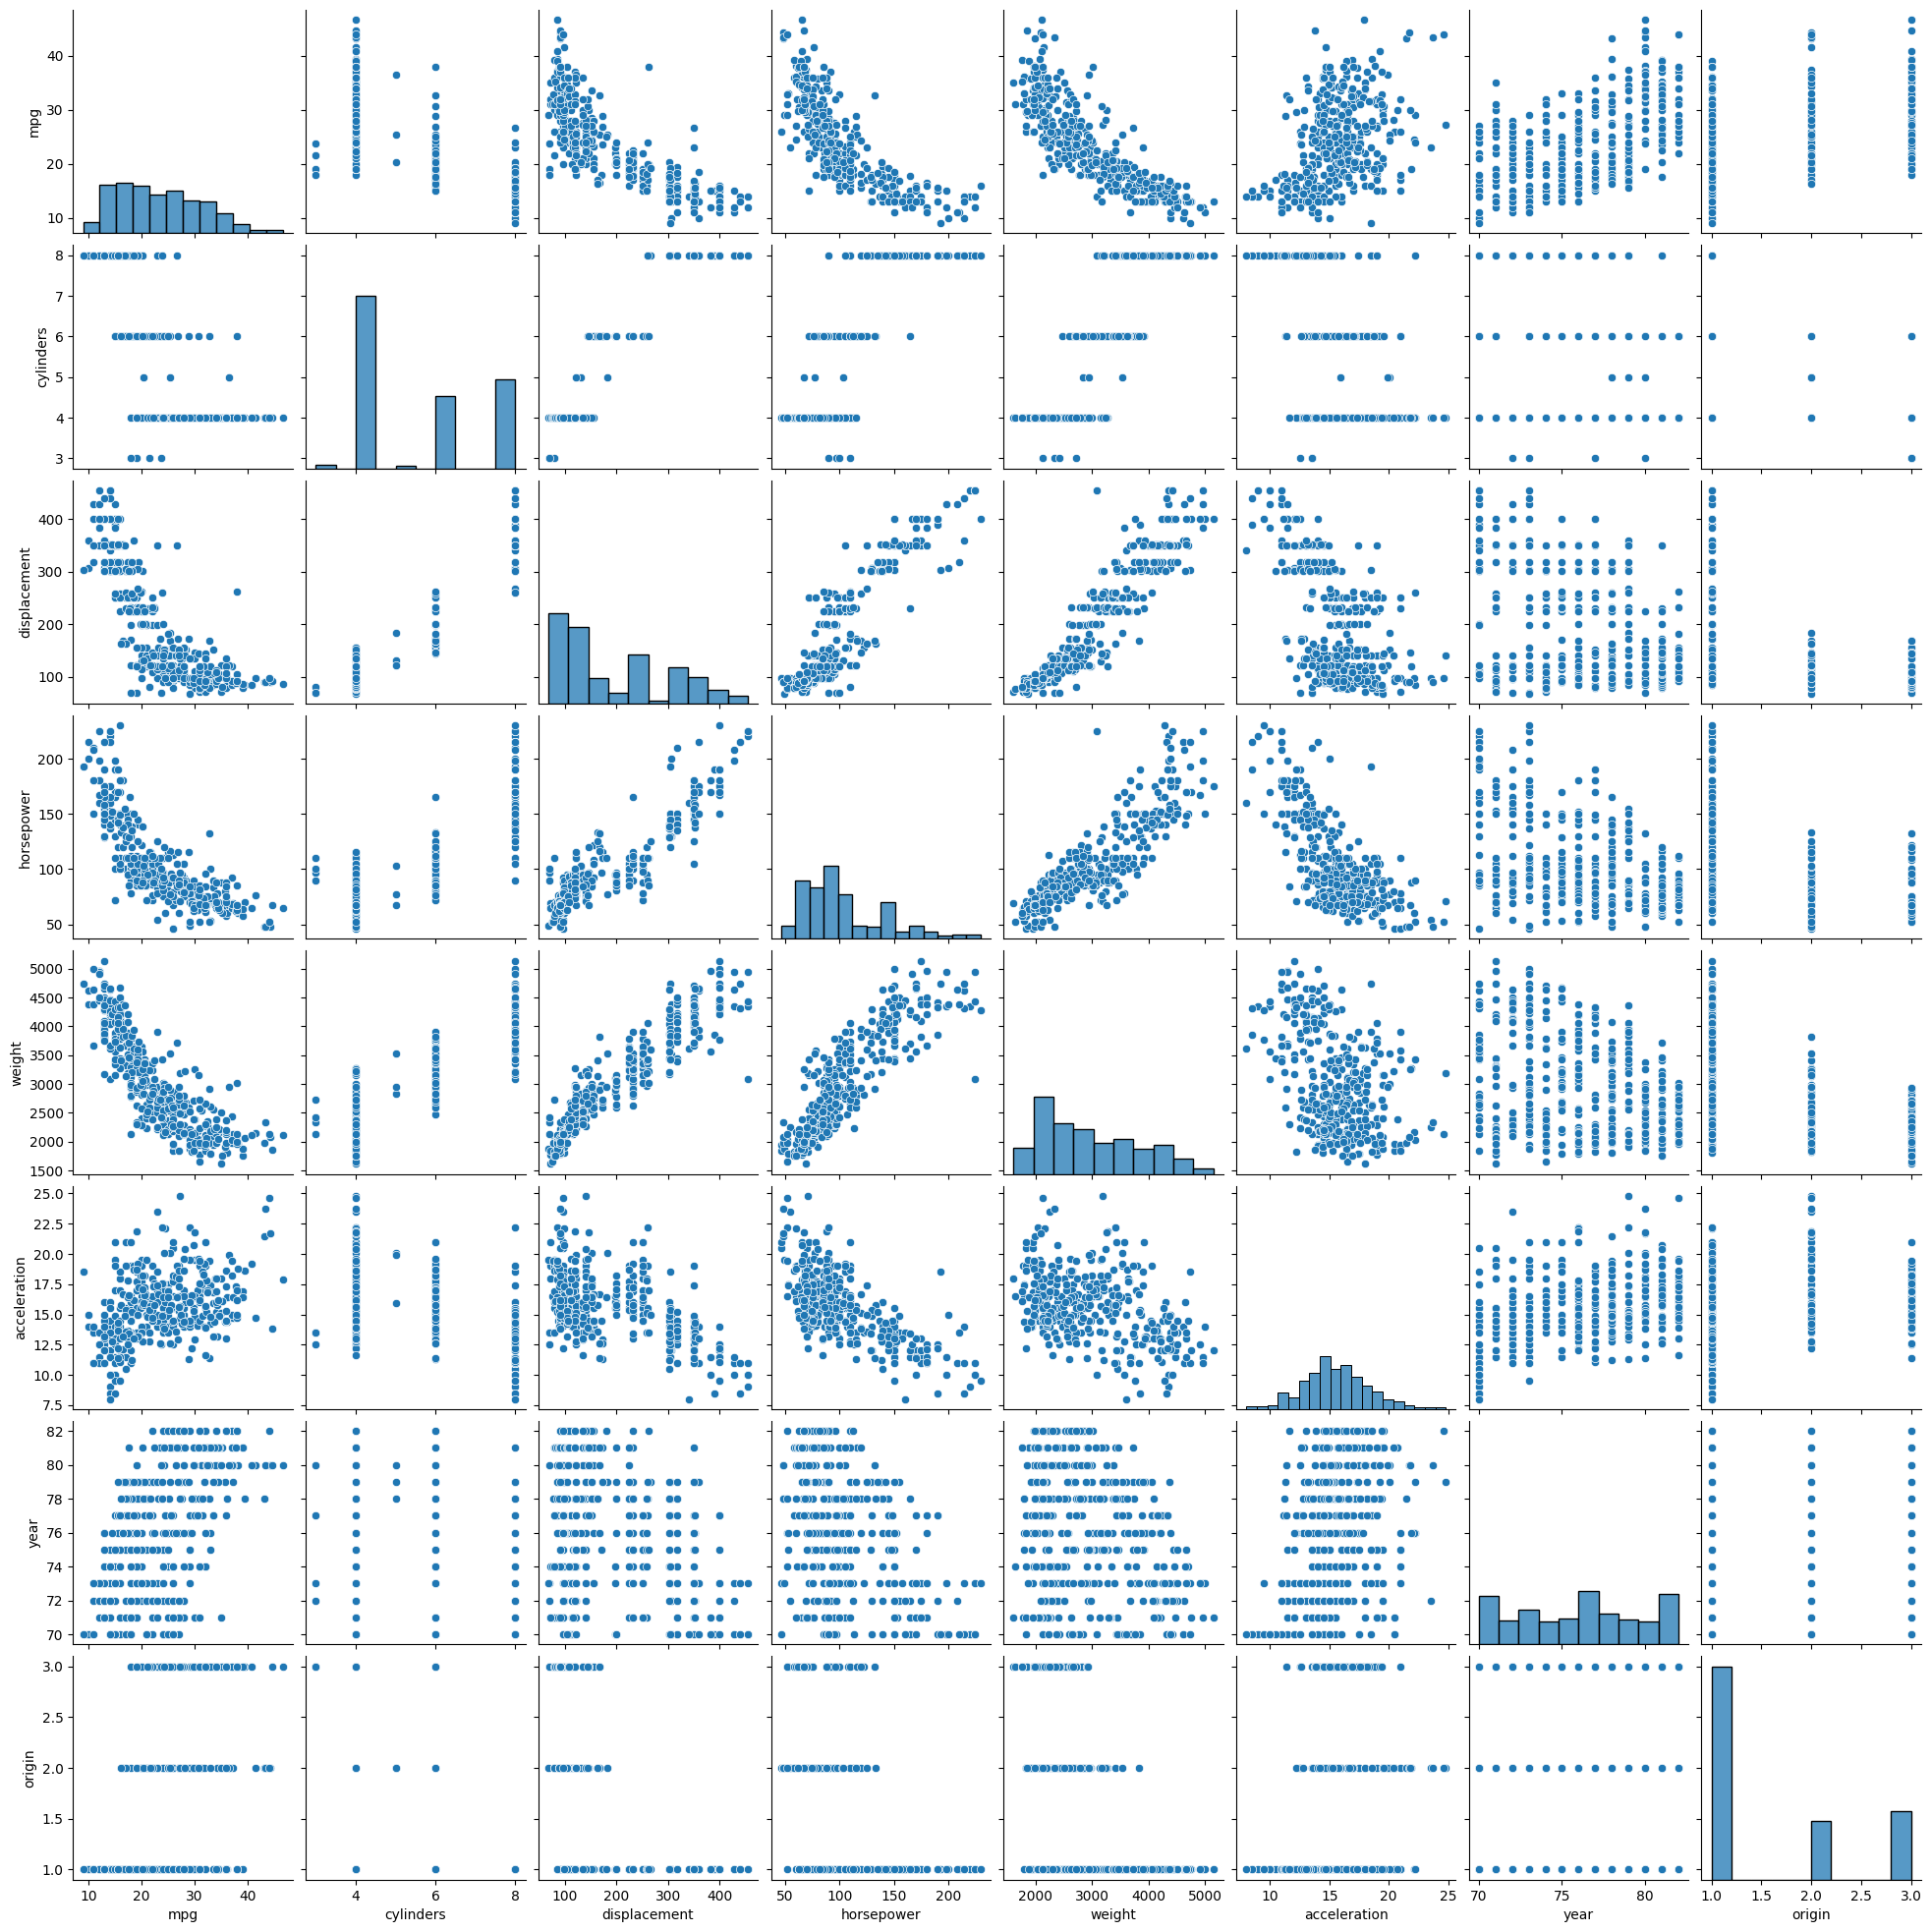

In [501]:
sns.pairplot(Auto)

#9b - Compute the matrix of correlations between the variables using the DataFrame.corr() method.


In [502]:
Auto.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  
year              0.290316  1.000000  0.181528  
origin            0.212746  0.181528  1.000000

#9c - Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors.

#I tried doing this method the lab did in the book but have an issue as Pandas and this method seem incompatible even though the book says it is possible. So I am doing the following method I found online.

In [503]:
formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'
multi_model = smf.ols(formula, data=Auto)
results_multi = multi_model.fit()
anova_lm(results_multi)


df        sum_sq       mean_sq            F         PR(>F)
cylinders       1.0  14403.083079  14403.083079  1300.683788  2.319511e-125
displacement    1.0   1073.344025   1073.344025    96.929329   1.530906e-20
horsepower      1.0    403.408069    403.408069    36.430140   3.731128e-09
weight          1.0    975.724953    975.724953    88.113748   5.544461e-19
acceleration    1.0      0.966071      0.966071     0.087242   7.678728e-01
year            1.0   2419.120249   2419.120249   218.460900   1.875281e-39
origin          1.0    291.134494    291.134494    26.291171   4.665681e-07
Residual      384.0   4252.212530     11.073470          NaN            NaN

#From the data we can see that most of the variables besides accelration seem to have a strong correlation to the multi model. we fail to reject a 0 magnitude effect from acceleration in this model. Cylinders, Displacment, Weight, Horsepower adn Year seemed to have the most statistical significance in impacting mpg. The coefficient means that for a car that is newer by a year (has an 1 increase in the year value) the mpg saw an increase by about 0.58 mpg.


#9d - Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

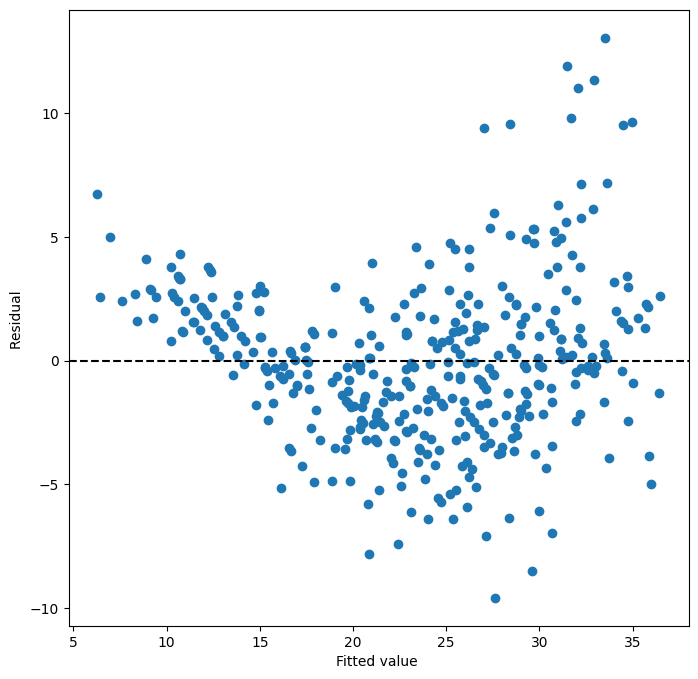

In [504]:
ax = plt.subplots(figsize =(8 ,8))[1]
ax.scatter(results_multi.fittedvalues , results_multi.resid)
ax.set_xlabel ('Fitted value ')
ax.set_ylabel ('Residual ')
ax.axhline (0, c='k', ls='--');


13

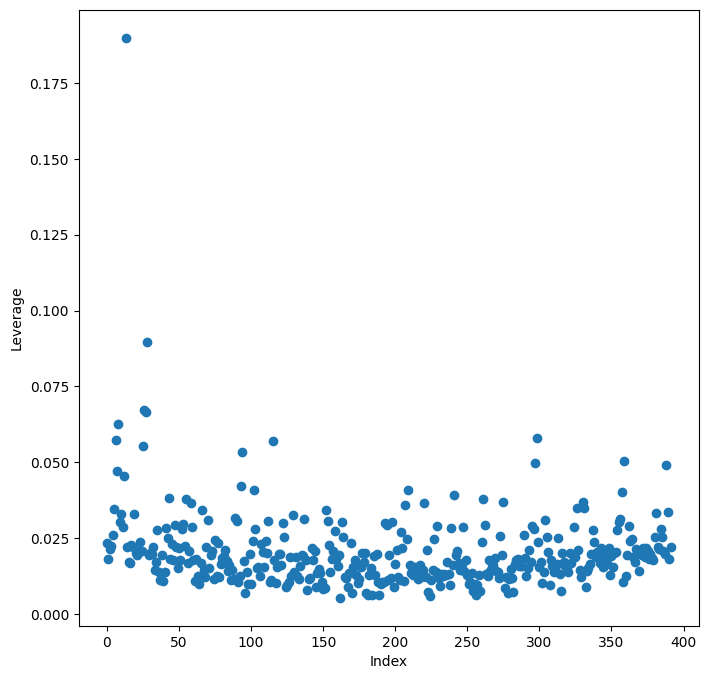

In [505]:
infl = results_multi.get_influence()
ax = plt.subplots(figsize =(8 ,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

#There was high residulas at lower and higher fitted values aswell as higher leverage for the lower indexes which seemed like a big outlier. However the leverage seeems rather consistent and not out of normal levels except for one outlier which had abnormally higher leverage than other values. This could influence the trend our model visualizes which could stray away from the true model.

#9e - Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [506]:
formula_interaction = 'mpg ~ cylinders * displacement + horsepower * weight + acceleration * year + origin'
interaction_model = smf.ols(formula_interaction, data=Auto)
results_interaction = interaction_model.fit()
print(results_interaction.summary())
anova_lm(results_interaction,results_multi)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     266.1
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          4.42e-165
Time:                        04:14:39   Log-Likelihood:                -953.98
No. Observations:                 392   AIC:                             1930.
Df Residuals:                     381   BIC:                             1974.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                111

df_resid          ssr  df_diff      ss_diff          F  Pr(>F)
0     381.0  2982.899441      0.0          NaN        NaN     NaN
1     384.0  4252.212530     -3.0 -1269.313089  38.208832     NaN

#Horsepower x Weight and Acceleration x Year were the only two that seemed to be statistically significant with cylinders x displacement having a low t value meaning we can't rule out the possibility of a 0 coefficient effect.

#9f - Try a few different transformations of variables and comment findings.

In [507]:
Auto_transformed = Auto.copy()


Auto_transformed['log_horsepower'] = np.log(Auto_transformed['horsepower'])
Auto_transformed['sqrt_weight'] = np.sqrt(Auto_transformed['weight'])
Auto_transformed['displacement_sq'] = Auto_transformed['displacement'] ** 2

# Define formulas with transformed variables
transform_formulas = [
    'mpg ~ log_horsepower + weight + acceleration + year + origin',
    'mpg ~ horsepower + sqrt_weight + acceleration + year + origin',
    'mpg ~ cylinders + displacement_sq + horsepower + weight + acceleration + year + origin',

]

for formula in transform_formulas:
    model = smf.ols(formula, data=Auto_transformed)
    results = model.fit()
    print(f"Formula: {formula}")
    print(results.summary())
    print("\n" + "=" * 50 + "\n")

Formula: mpg ~ log_horsepower + weight + acceleration + year + origin
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     386.5
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          8.38e-148
Time:                        04:14:39   Log-Likelihood:                -1009.8
No. Observations:                 392   AIC:                             2032.
Df Residuals:                     386   BIC:                             2055.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

# The transformed variables log_horsepower and sqrt_weight appear to provide a slightly improved  fit without drastically changin the model's interpretation. The log transformation of horsepower shows that there may be a non linear relationship where an increase in horsepower has a diminishing effect on mpg while meaning smaller engines experience greater efficiency losses than larger ones. The square root transformation of weight showed a diminishing marginal impact of weight on fuel efficiency with the reinforcing the theory that heavier cars experience decreasing fuel efficiency losses as weight increases. These transformations help stabilize variance and may reduce multicollinearity.

#13a - Using the normal() method of your random number generator create a vector, x, containing 100 observations drawn from a N(0,1) distribution this represents a feature X.

In [508]:
x = np.random.normal(0,1,100)
print(x)
len(x)

[-0.71896528 -0.34378447 -1.90126314 -0.7166678  -1.09313582 -0.53335378
  0.36020486 -1.19199502 -0.46485476  0.12300601 -0.41268306  2.07004512
 -1.85527234 -0.38975872 -0.14004807  0.31852385 -0.27715562 -0.74594951
  0.50877153 -0.12250746  1.56864964 -0.49433578  0.91988573  0.95886672
  1.44460813 -0.09978292 -0.00258054 -0.1969089  -0.14392027  0.94025683
  0.62119071  0.03390489 -0.04505755 -0.40027573 -0.80040501 -0.25120053
 -0.05990054  1.23542633 -0.73200465  1.62820874 -0.4633571   0.14388312
 -0.66630152 -0.10244666  0.35033646  1.39209807 -0.10236811 -0.105457
 -0.13125279  0.71040822  0.1587125   0.21055242 -0.26544538 -1.63809408
  0.69822819  1.12406972 -0.00695001  1.71591774 -0.72964932 -0.17485043
 -0.70993145 -0.7463968   0.26591789 -1.53825153 -1.52359683 -0.57863163
 -1.03810944  0.95843485  0.53822113  1.26119733  0.70161703  1.6376215
 -0.43924641  1.48685961 -0.50640188  1.27062862  1.23771299  0.74896209
  1.13169073  0.54482615  0.48997149 -0.87356548  0.26

100

#13b - Using normal method create a vectore, eps, contining 100 obs drawn from a N(0,0.25) dist.

In [509]:
eps = np.random.normal(0,0.5,100)
print(eps)

[ 0.16371882  0.14657842 -1.42959459  0.64502854 -0.38839181 -0.01002392
 -0.18145081  0.62021593  0.40304532 -0.37946853 -0.06142914  0.73286436
  0.27015559  0.03842355  0.18149251  0.26064104  0.49729375  0.31701974
 -0.20824801  0.94967055  1.10949837  0.41602695 -0.32726152  0.40577725
 -0.42074245 -0.33570135  0.45977608  0.18559324 -0.24101175 -0.56326801
 -0.14770939  0.38827517  0.2843148   0.15414563 -0.2368309  -0.68696089
  0.11772286  0.10077489  1.01509441 -0.1970753  -0.9119012   0.10638436
  0.4113634  -0.57063902 -1.15049578 -0.22045401 -0.33900044  0.45784901
 -0.10998022 -0.94086333 -0.70753865 -0.09717885 -0.28995288 -0.88726563
 -0.30499893  0.16120043  0.1872182  -0.18922199 -0.58117743 -0.93478573
  0.63918291 -0.7934551   0.11752694  0.26534985  0.02456851  0.07633705
  0.611251   -0.20234985  0.61669537  0.24871942  0.41560693 -0.48441315
 -0.54254096 -0.55736905 -0.79325342  0.53289726 -0.18547117  0.88306492
  0.89730986 -0.23323246 -0.62885952  0.88866358  0

#13c - using x and eps, generate a vector y according to model:
#Y = -1 + 0.5X +e
# what is the lenght of the vector? what are the values of b0 and b1 in this linear model

In [510]:
y = -1 + (x/2) + eps
print(y)
len(y)

[-1.19576382 -1.02531381 -3.38022616 -0.71330536 -1.93495972 -1.27670081
 -1.00134838 -0.97578158 -0.82938206 -1.31796552 -1.26777067  0.76788692
 -1.65748058 -1.15645581 -0.88853153 -0.58009703 -0.64128407 -1.05595502
 -0.95386225 -0.11158318  0.89382319 -0.83114094 -0.86731866 -0.11478939
 -0.69843839 -1.38559281 -0.54151419 -0.91286121 -1.31297188 -1.09313959
 -0.83711404 -0.59477238 -0.73821398 -1.04599223 -1.63703341 -1.81256116
 -0.9122274  -0.28151195 -0.35090792 -0.38297093 -2.14357975 -0.82167408
 -0.92178736 -1.62186234 -1.97532755 -0.52440498 -1.3901845  -0.59487949
 -1.17560662 -1.58565922 -1.6281824  -0.99190264 -1.42267557 -2.70631267
 -0.95588484 -0.27676471 -0.81625681 -0.33126312 -1.94600209 -2.02221095
 -0.71578282 -2.1666535  -0.74951411 -1.50377591 -1.7372299  -1.21297876
 -0.90780372 -0.72313242 -0.11419407 -0.12068191 -0.23358455 -0.6656024
 -1.76216417 -0.81393924 -2.04645435  0.16821157 -0.56661467  0.25754596
  0.46315523 -0.96081939 -1.38387378 -0.54811916 -0.

100

#The lenght of the vector is 100 meaning it has 100 values within it. B0 is equal to -1 from the model we made above and b1 is 1/2

#13d - Create a scatterplot displaying the relationship betweenx and y. Comment on what you observe.

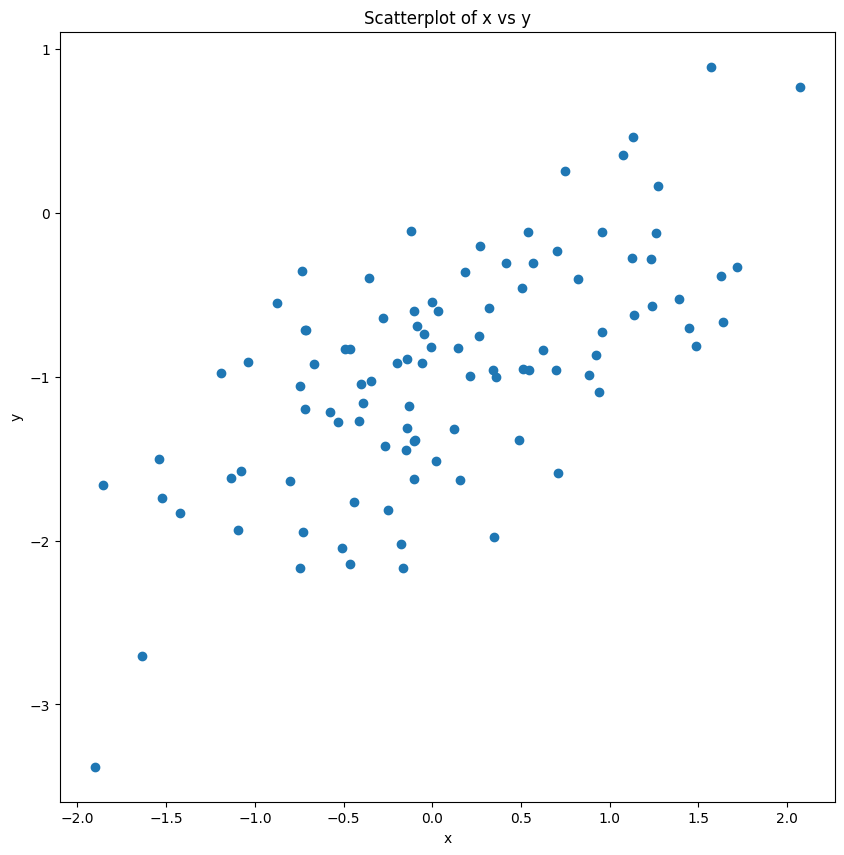

In [511]:
plt.figure(figsize=(10, 10))
plt.scatter(x ,y )
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of x vs y')
plt.show()

#This is a routine linear relationship with some noise around it. We can observe that the relationship looks almost perfectly linear and the data starts in the negative quadrant of the plot.

#13e - Fit a least squares linear model to predict y using x. Comment on the model obtained. How do ^β0 and ^β1 compare to β0 and β1?

In [512]:
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

b0_pred = results.params[0]
b1_pred = results.params[1]
print(f"Predicted b0: {b0_pred}")
print(f"Predicted b1: {b1_pred}")

print(f"Actual b0: -1")
print(f"Actual b1: 1/2")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     77.02
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           5.46e-14
Time:                        04:14:39   Log-Likelihood:                -77.747
No. Observations:                 100   AIC:                             159.5
Df Residuals:                      98   BIC:                             164.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9978      0.053    -18.700      0.0

#The actual and predicted coefficients were very close however not equal. there was an extremely small amount of error in both terms however they did capture the general trend of the data while be very clsoe to the true values.

#13f - Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() method of the axes to create an **appropriate** legend.

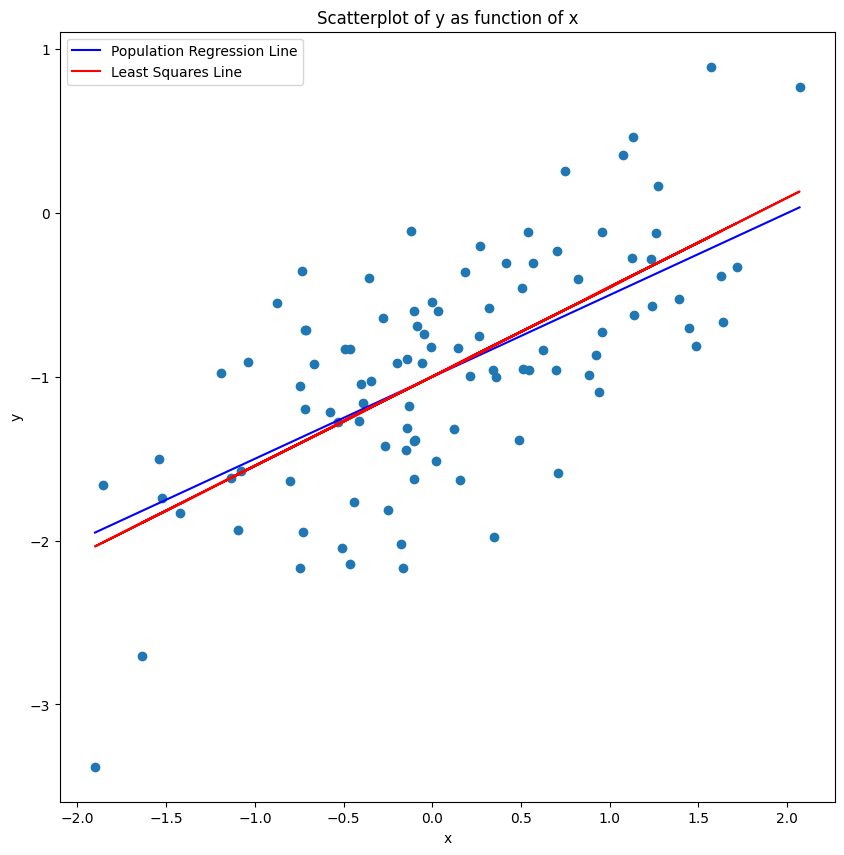

In [513]:
pred_y = results.predict(x)
plt.figure(figsize=(10, 10))
plt.scatter(x[:,1] ,y )
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of y as function of x')

x_pop = np.linspace(x[:, 1].min(), x[:, 1].max(), 100)
y_pop = -1 + 0.5 * x_pop


plt.plot(x_pop, y_pop, color='blue', label='Population Regression Line')
plt.plot(x[:,1], pred_y, color='red', label='Least Squares Line')
plt.legend()
plt.show()




#13g - Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [514]:
x_squared = x[:, 1]**2
X_poly = np.column_stack((x, x_squared))
model_poly = sm.OLS(y, X_poly)
results_poly = model_poly.fit()
print(results_poly.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     38.20
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           5.82e-13
Time:                        04:14:40   Log-Likelihood:                -77.699
No. Observations:                 100   AIC:                             161.4
Df Residuals:                      97   BIC:                             169.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9850      0.068    -14.453      0.0

#According to the summary statistics it seems that there is vert little to assume that the x^2 variable contributed to our model with a t value that is very low not ruling out that it has a 0 magnitude effect on the y value.

# 13h - Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ϵ in (b). Describe your results.

In [515]:
eps_reduced = np.random.normal(0,0.0625,100)
y = -1 + (x[:, 1]/2) + eps_reduced
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

b0_pred = results.params[0]
b1_pred = results.params[1]
print(f"Predicted b0: {b0_pred}")
print(f"Predicted b1: {b1_pred}")

print(f"Actual b0: -1")
print(f"Actual b1: 1/2")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     4393.
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           3.29e-83
Time:                        04:14:40   Log-Likelihood:                 131.94
No. Observations:                 100   AIC:                            -259.9
Df Residuals:                      98   BIC:                            -254.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9916      0.007   -151.289      0.0

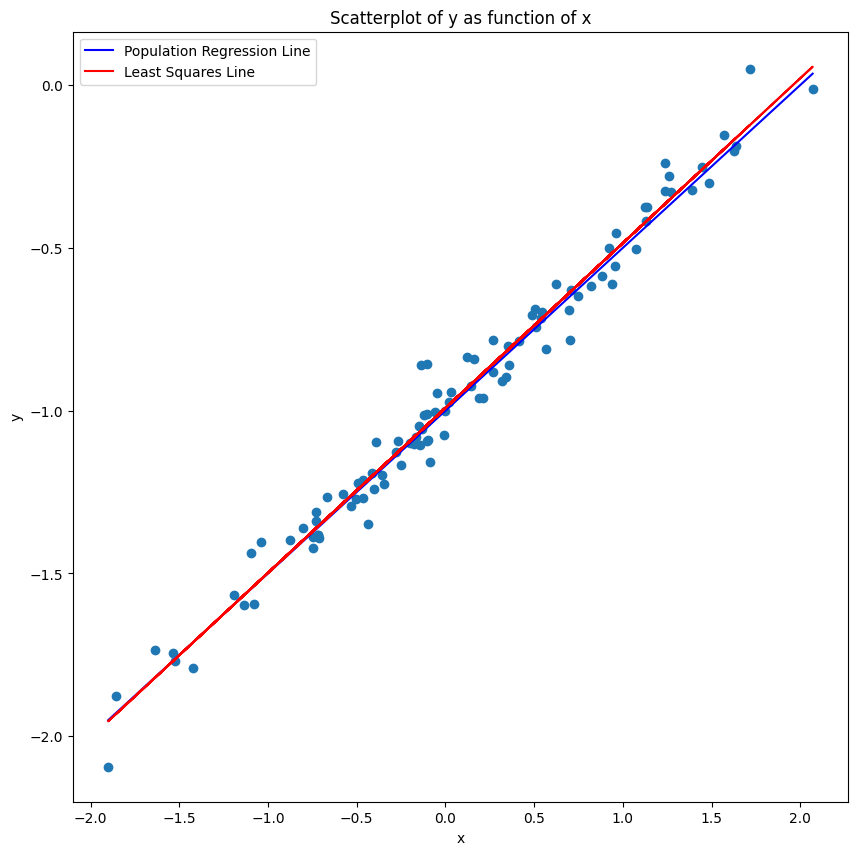

In [516]:
pred_y = results.predict(x)
plt.figure(figsize=(10, 10))
plt.scatter(x[:,1] ,y )
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of y as function of x')

x_pop = np.linspace(x[:, 1].min(), x[:, 1].max(), 100)
y_pop = -1 + 0.5 * x_pop


plt.plot(x_pop, y_pop, color='blue', label='Population Regression Line')
plt.plot(x[:,1], pred_y, color='red', label='Least Squares Line')
plt.legend()
plt.show()


#The reduced noise did make the ols line get closer to the true population line but that was due to lesser noise and data that strayed away from the true population line. This is the closest the OLS line has been to replacing the population line.

#13i - Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ϵ in (b). Describe your results.

In [517]:
eps_increased = np.random.normal(0,0.75,100)
y = -1 + (x[:, 1]/2) + eps_increased
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

b0_pred = results.params[0]
b1_pred = results.params[1]
print(f"Predicted b0: {b0_pred}")
print(f"Predicted b1: {b1_pred}")

print(f"Actual b0: -1")
print(f"Actual b1: 1/2")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     47.13
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           6.09e-10
Time:                        04:14:40   Log-Likelihood:                -108.43
No. Observations:                 100   AIC:                             220.9
Df Residuals:                      98   BIC:                             226.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0481      0.073    -14.453      0.0

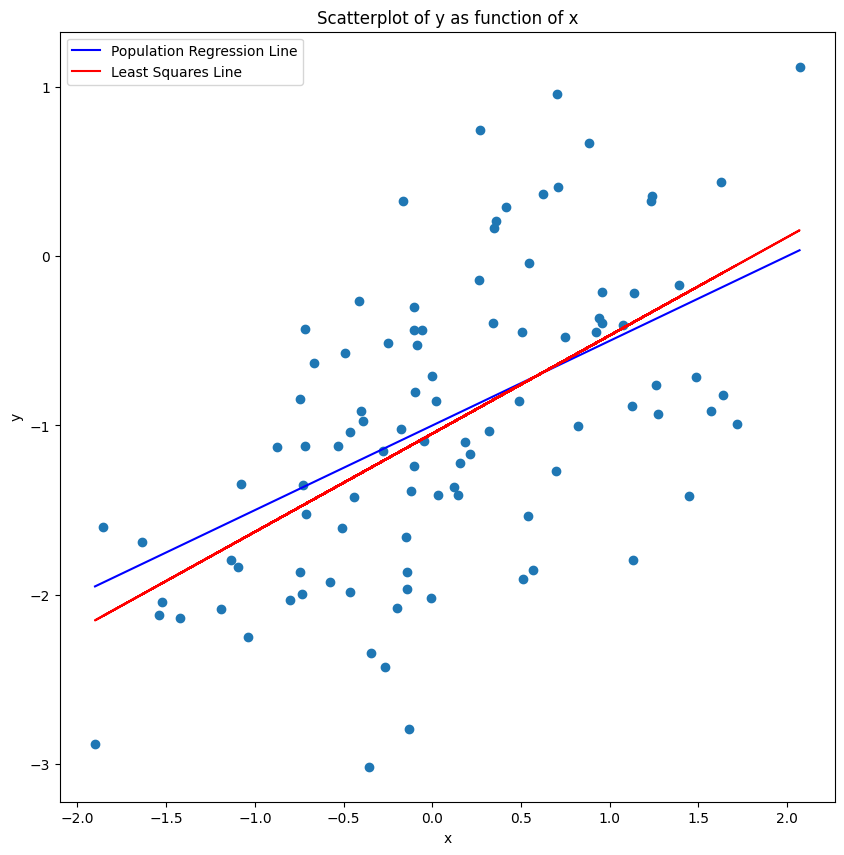

In [518]:
pred_y = results.predict(x)
plt.figure(figsize=(10, 10))
plt.scatter(x[:,1] ,y )
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of y as function of x')

x_pop = np.linspace(x[:, 1].min(), x[:, 1].max(), 100)
y_pop = -1 + 0.5 * x_pop


plt.plot(x_pop, y_pop, color='blue', label='Population Regression Line')
plt.plot(x[:,1], pred_y, color='red', label='Least Squares Line')
plt.legend()
plt.show()


#The increased noise made the ols line less accurate to use to predict the population line. while the slopes were still close the intercept ended up moving lower. the increased noise has definetly made the ols underfit the model which will make residual errors between predictions and trye values larger.

#13j - What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your result?

In [519]:
x = sm.add_constant(x)
model_original = sm.OLS(y, x)
results_original = model_original.fit()

conf_int_original = results_original.conf_int(alpha=0.05)


print(conf_int_original)

[[-1.19202563 -0.90420331]
 [ 0.41248953  0.74790816]]


In [520]:
y_more_noise = -1 + (x[:, 1] / 2) + eps_increased
model_more_noise = sm.OLS(y_more_noise, x)
results_more_noise = model_more_noise.fit()

conf_int_more_noise = results_more_noise.conf_int(alpha=0.05)


print(conf_int_more_noise)

[[-1.19202563 -0.90420331]
 [ 0.41248953  0.74790816]]


In [521]:
y_less_noise = -1 + (x[:, 1] / 2) + eps_reduced
model_less_noise = sm.OLS(y_less_noise, x)
results_less_noise = model_less_noise.fit()

conf_int_less_noise = results_less_noise.conf_int(alpha=0.05)

print(conf_int_less_noise)

[[-1.00462128 -0.9786072 ]
 [ 0.49108169  0.52139764]]


#From the confidence intervals we can see that the least varied interval was the least noisy while the one with the most variance was the data with more noise. both coeficients of b0 and b1 were closer to the true population values in the less noisy data and the least accurate or larger confidence intervals were from the noisy data.

#15a - using the boston data set, For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions

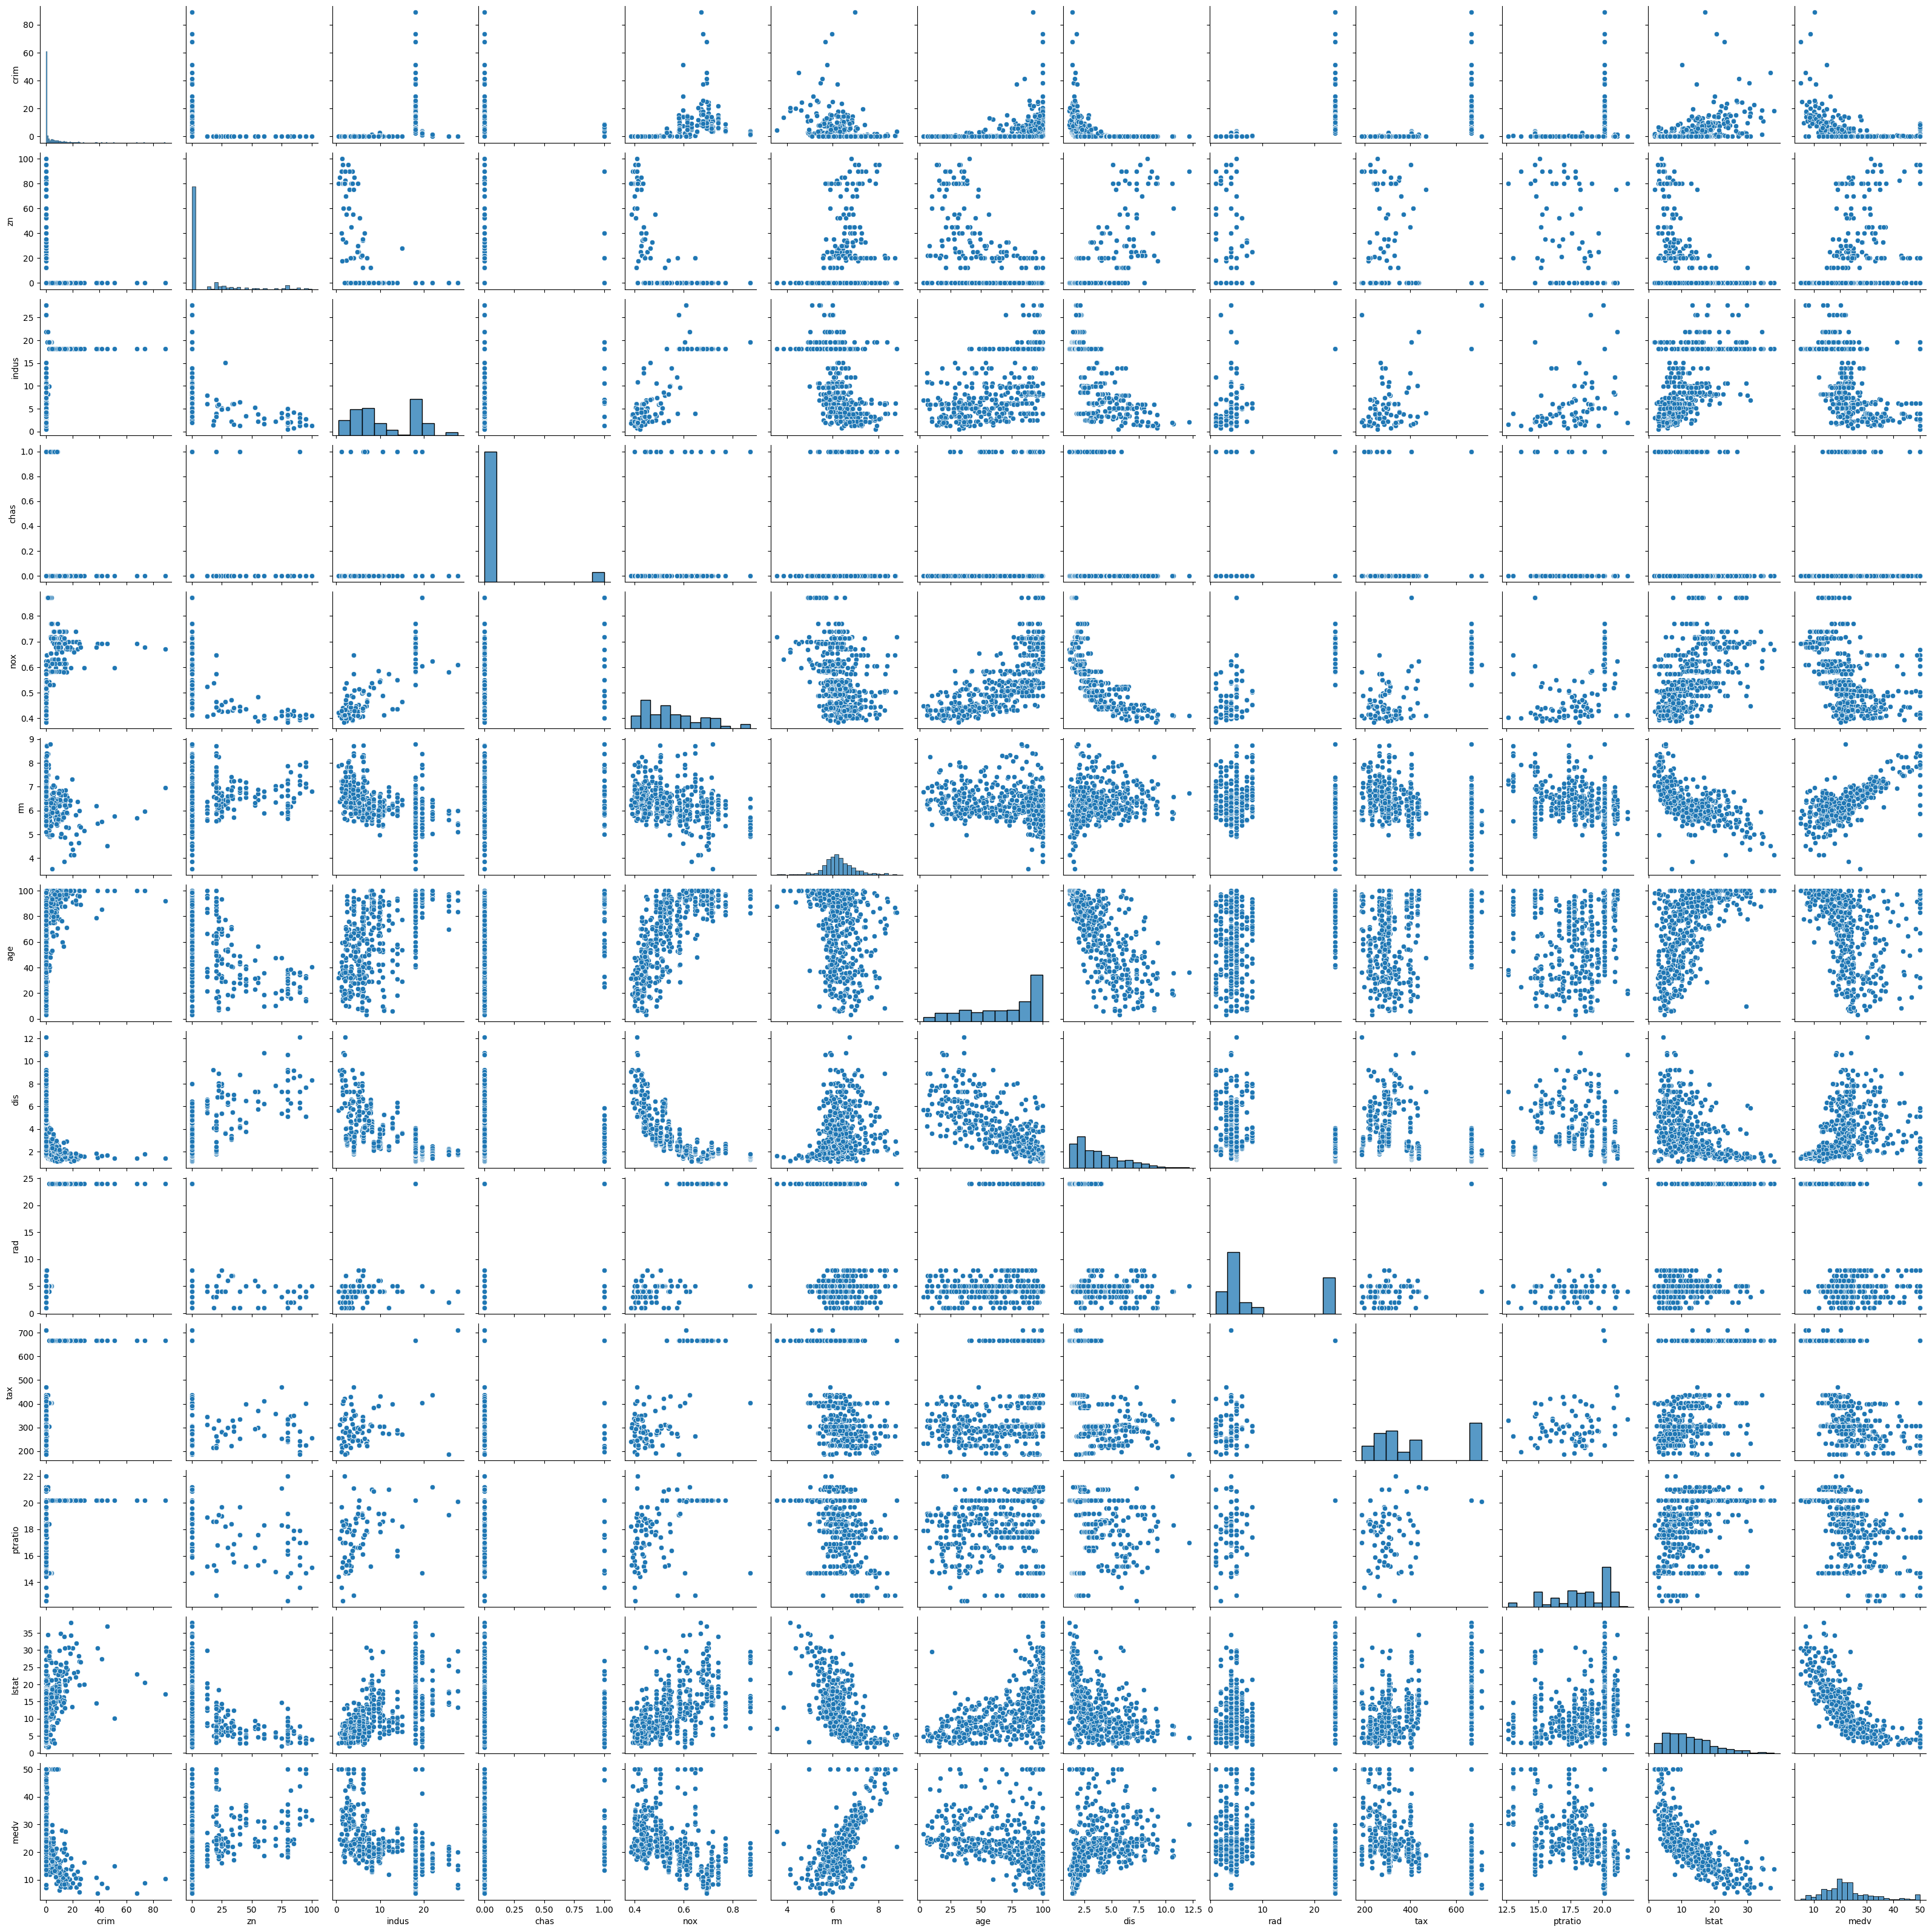

In [522]:
from ISLP import load_data
boston_data = load_data('Boston')
boston = pd.DataFrame(boston_data)
sns.pairplot(boston)

In [523]:
predictors = boston.columns.drop('medv')
results = {}

for predictor in predictors:
    formula = f'medv ~ {predictor}'
    model = smf.ols(formula, data=boston).fit()
    results[predictor] = model

for predictor, model in results.items():
  print(f"Predictor: {predictor}")
  print(model.summary())
  print("-" * 50)

Predictor: crim
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.17e-19
Time:                        04:15:08   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0331      0.409    

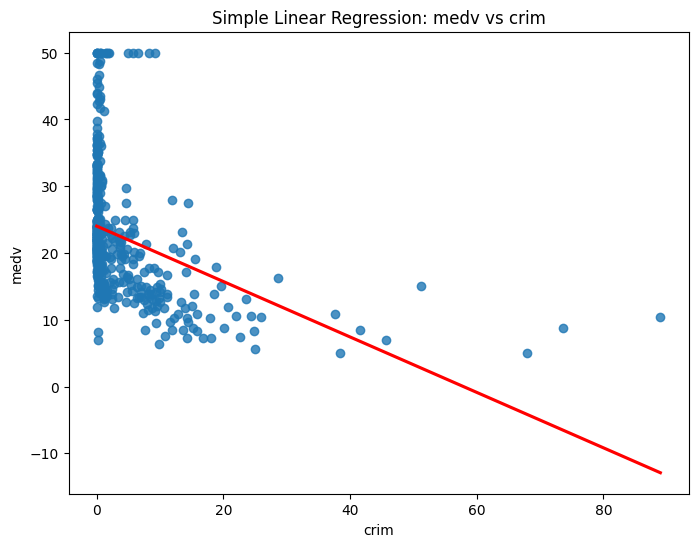

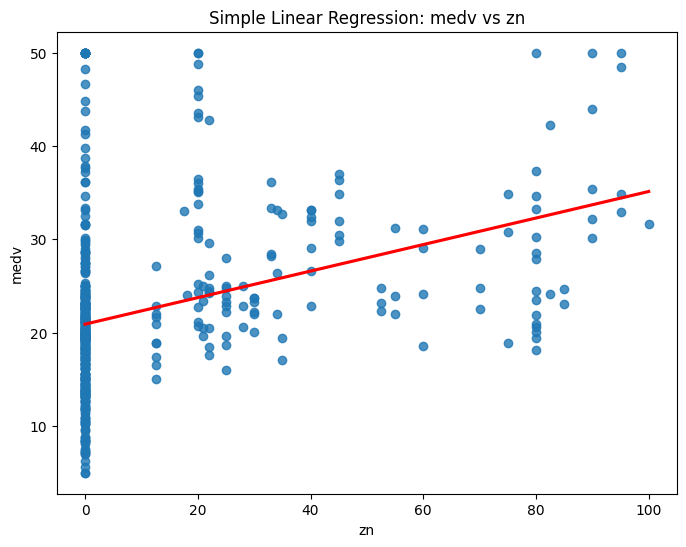

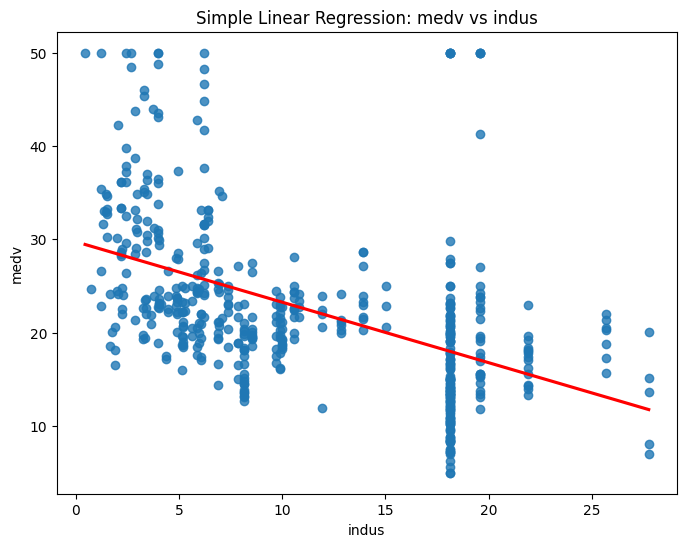

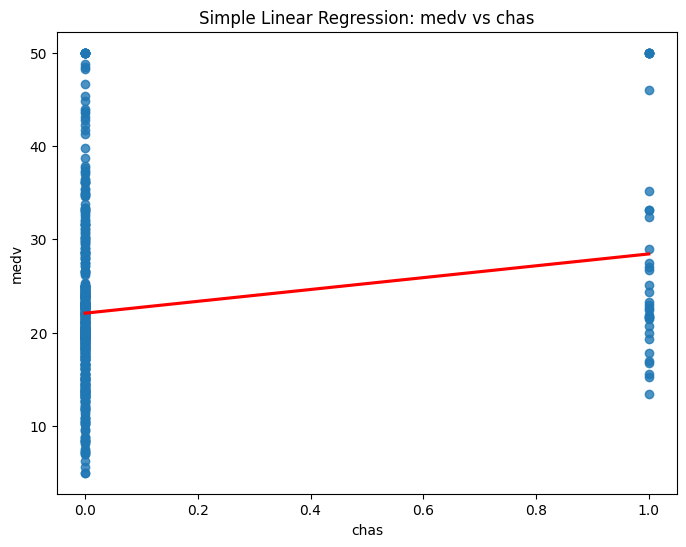

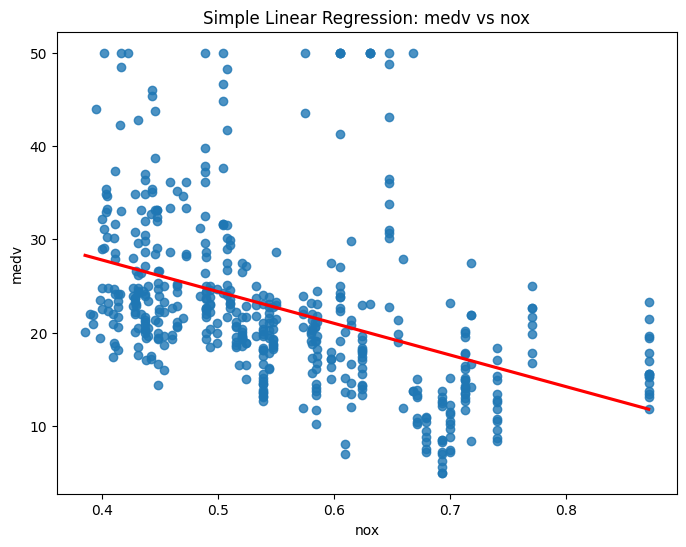

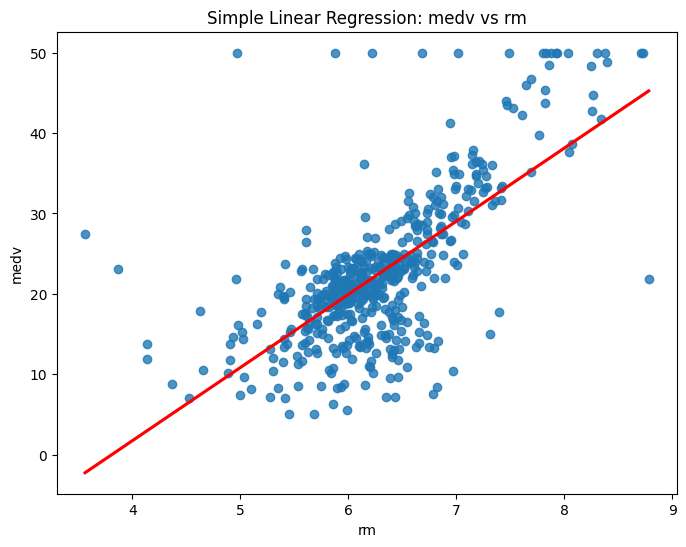

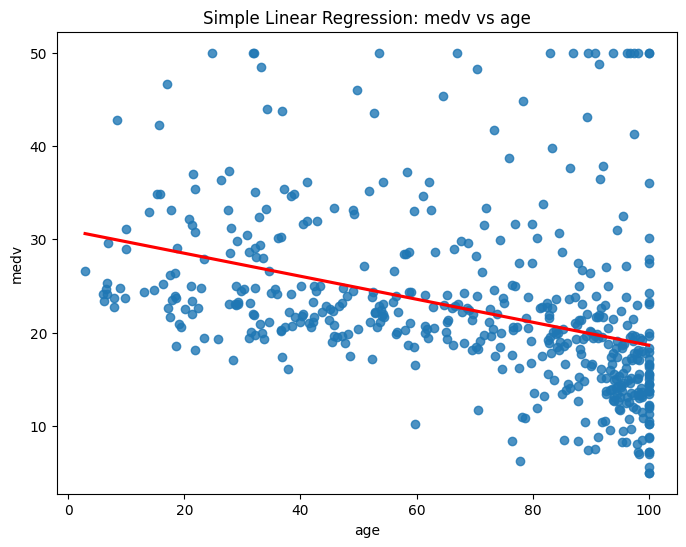

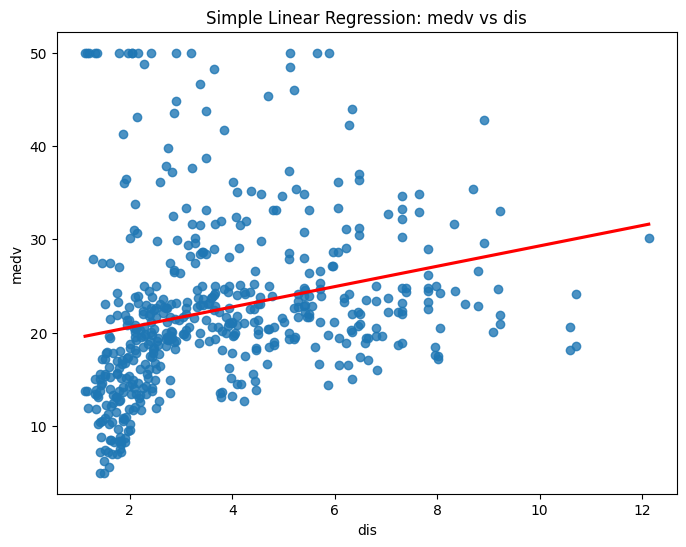

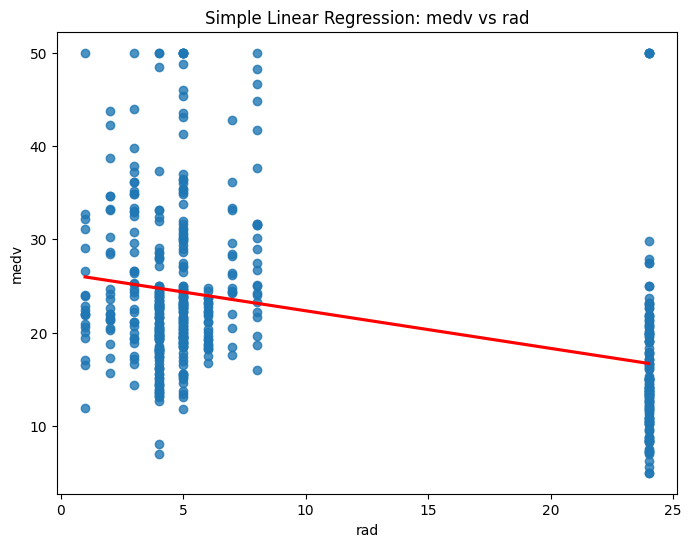

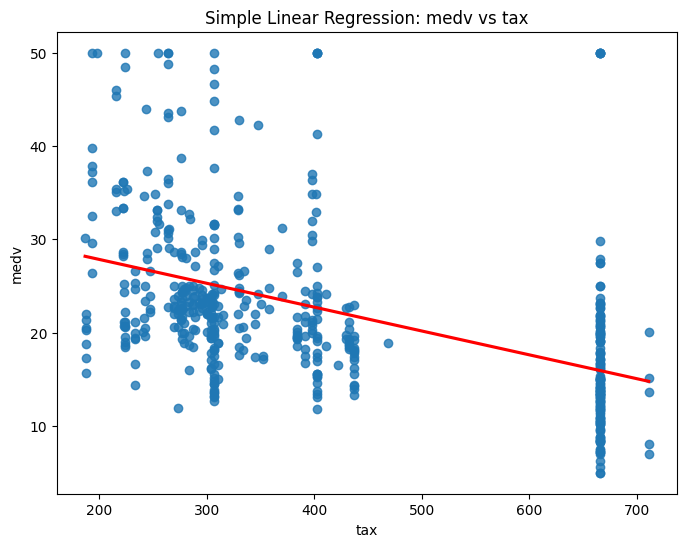

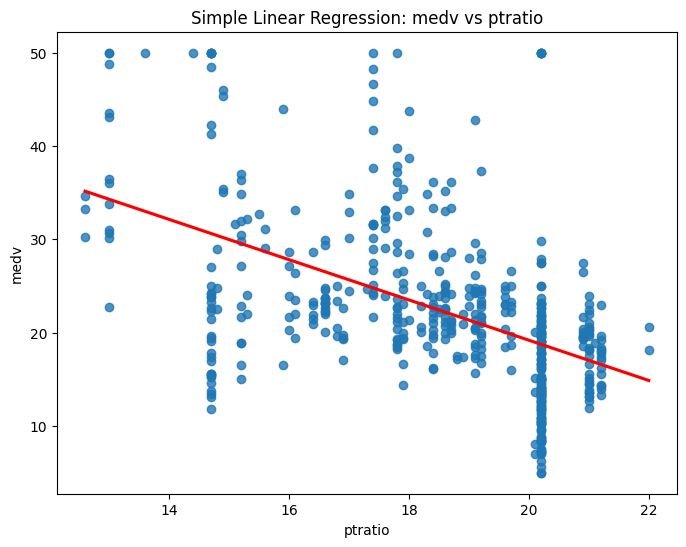

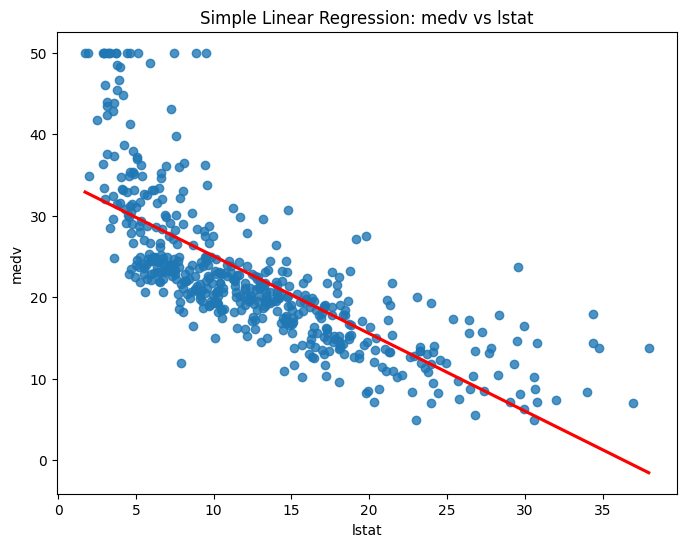

In [524]:
for predictor in predictors:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=predictor, y='medv', data=boston, ci=None, line_kws={'color': 'red'})
    plt.title(f'Simple Linear Regression: medv vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('medv')
    plt.show()

#Some realtionships that surfaced from the regression tables and the pairplots above came from predictors like Crm, Lstat, Age, Rm. These variables related to the crime rate within the suburb (crm), The percentage of people who are considered to be of lower socioeconomic status in the neighborhood (lstat), Age of the owner of the home (age), Avearge number of rooms in a dwelling. all these varaible had some predictive relatiosbho whe setting median owner occupied house value as a dependent variable (medv).

#15b - Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [525]:
formula = 'medv ~ ' + ' + '.join(boston.columns.drop('medv'))
model = smf.ols(formula, data=boston).fit()
print(model.summary())
significant_predictors = [
    predictor for predictor in model.pvalues.index[1:]
    if model.pvalues[predictor] < 0.05 ]
print("\nSignificant Predictors (p-value < 0.05):")
print(significant_predictors)


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          2.23e-133
Time:                        04:15:11   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.0

#How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis

<ipython-input-526-0ef02e6e4b17>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  univariate_coeffs = {predictor: model.params[1] for predictor, model in results.items()}


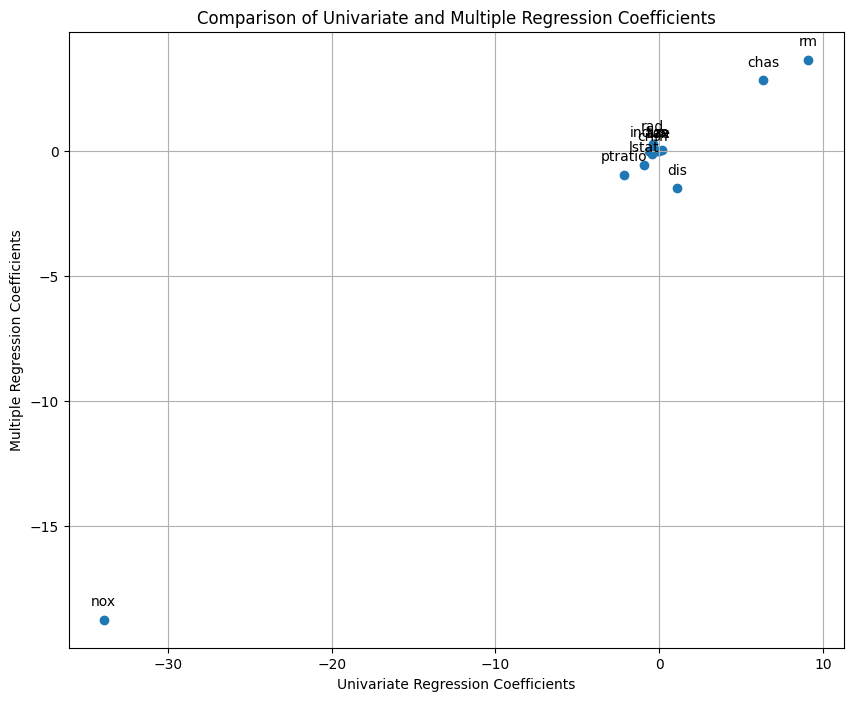

In [526]:

univariate_coeffs = {predictor: model.params[1] for predictor, model in results.items()}
multivariate_coeffs = {predictor: model.params[predictor] for predictor in predictors}

x_coords = list(univariate_coeffs.values())
y_coords = list(multivariate_coeffs.values())
labels = list(univariate_coeffs.keys())

plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords)

for i, label in enumerate(labels):
    plt.annotate(label, (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel("Univariate Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.title("Comparison of Univariate and Multiple Regression Coefficients")
plt.grid(True)
plt.show()

# In part A i disregarded some valid coefficients due to my interpretation from the graphs and tables as single predictors looked increadibly inconsistent. but in the multi reg those variable did prove to be useful in addition to the other predictors.

# 15d- Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form Y= β0 + β1X + β2X2 + β3X3 + ϵ.

In [527]:
for predictor in predictors:
    formula = f'medv ~ {predictor} + I({predictor}**2) + I({predictor}**3)'
    model = smf.ols(formula, data=boston).fit()
    print(f"Predictor: {predictor}")
    print(model.summary())
    print("-" * 50)

Predictor: crim
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     46.57
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.45e-26
Time:                        04:15:11   Log-Likelihood:                -1778.1
No. Observations:                 506   AIC:                             3564.
Df Residuals:                     502   BIC:                             3581.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       25.1905      0.4

#Crim, zn, indus, chas, rm, dis, rad, tax, lstat were the only predictors that had consitent low pvalues on all terms which allowed for them to fit into non linear regression. This intuitively makes sense for a lot of the variables where crime rates or even the number of rooms can have an accelerating of even diminishing returns for every increase which lowers the magnitude of the effect they have on medv. There is strong eveidence both intutive and in the models to prove the variables above have some non linear relationship to the explanatory variable.

#**Part 3**


#1. Plot some relationships from the Homes data set and tell a story


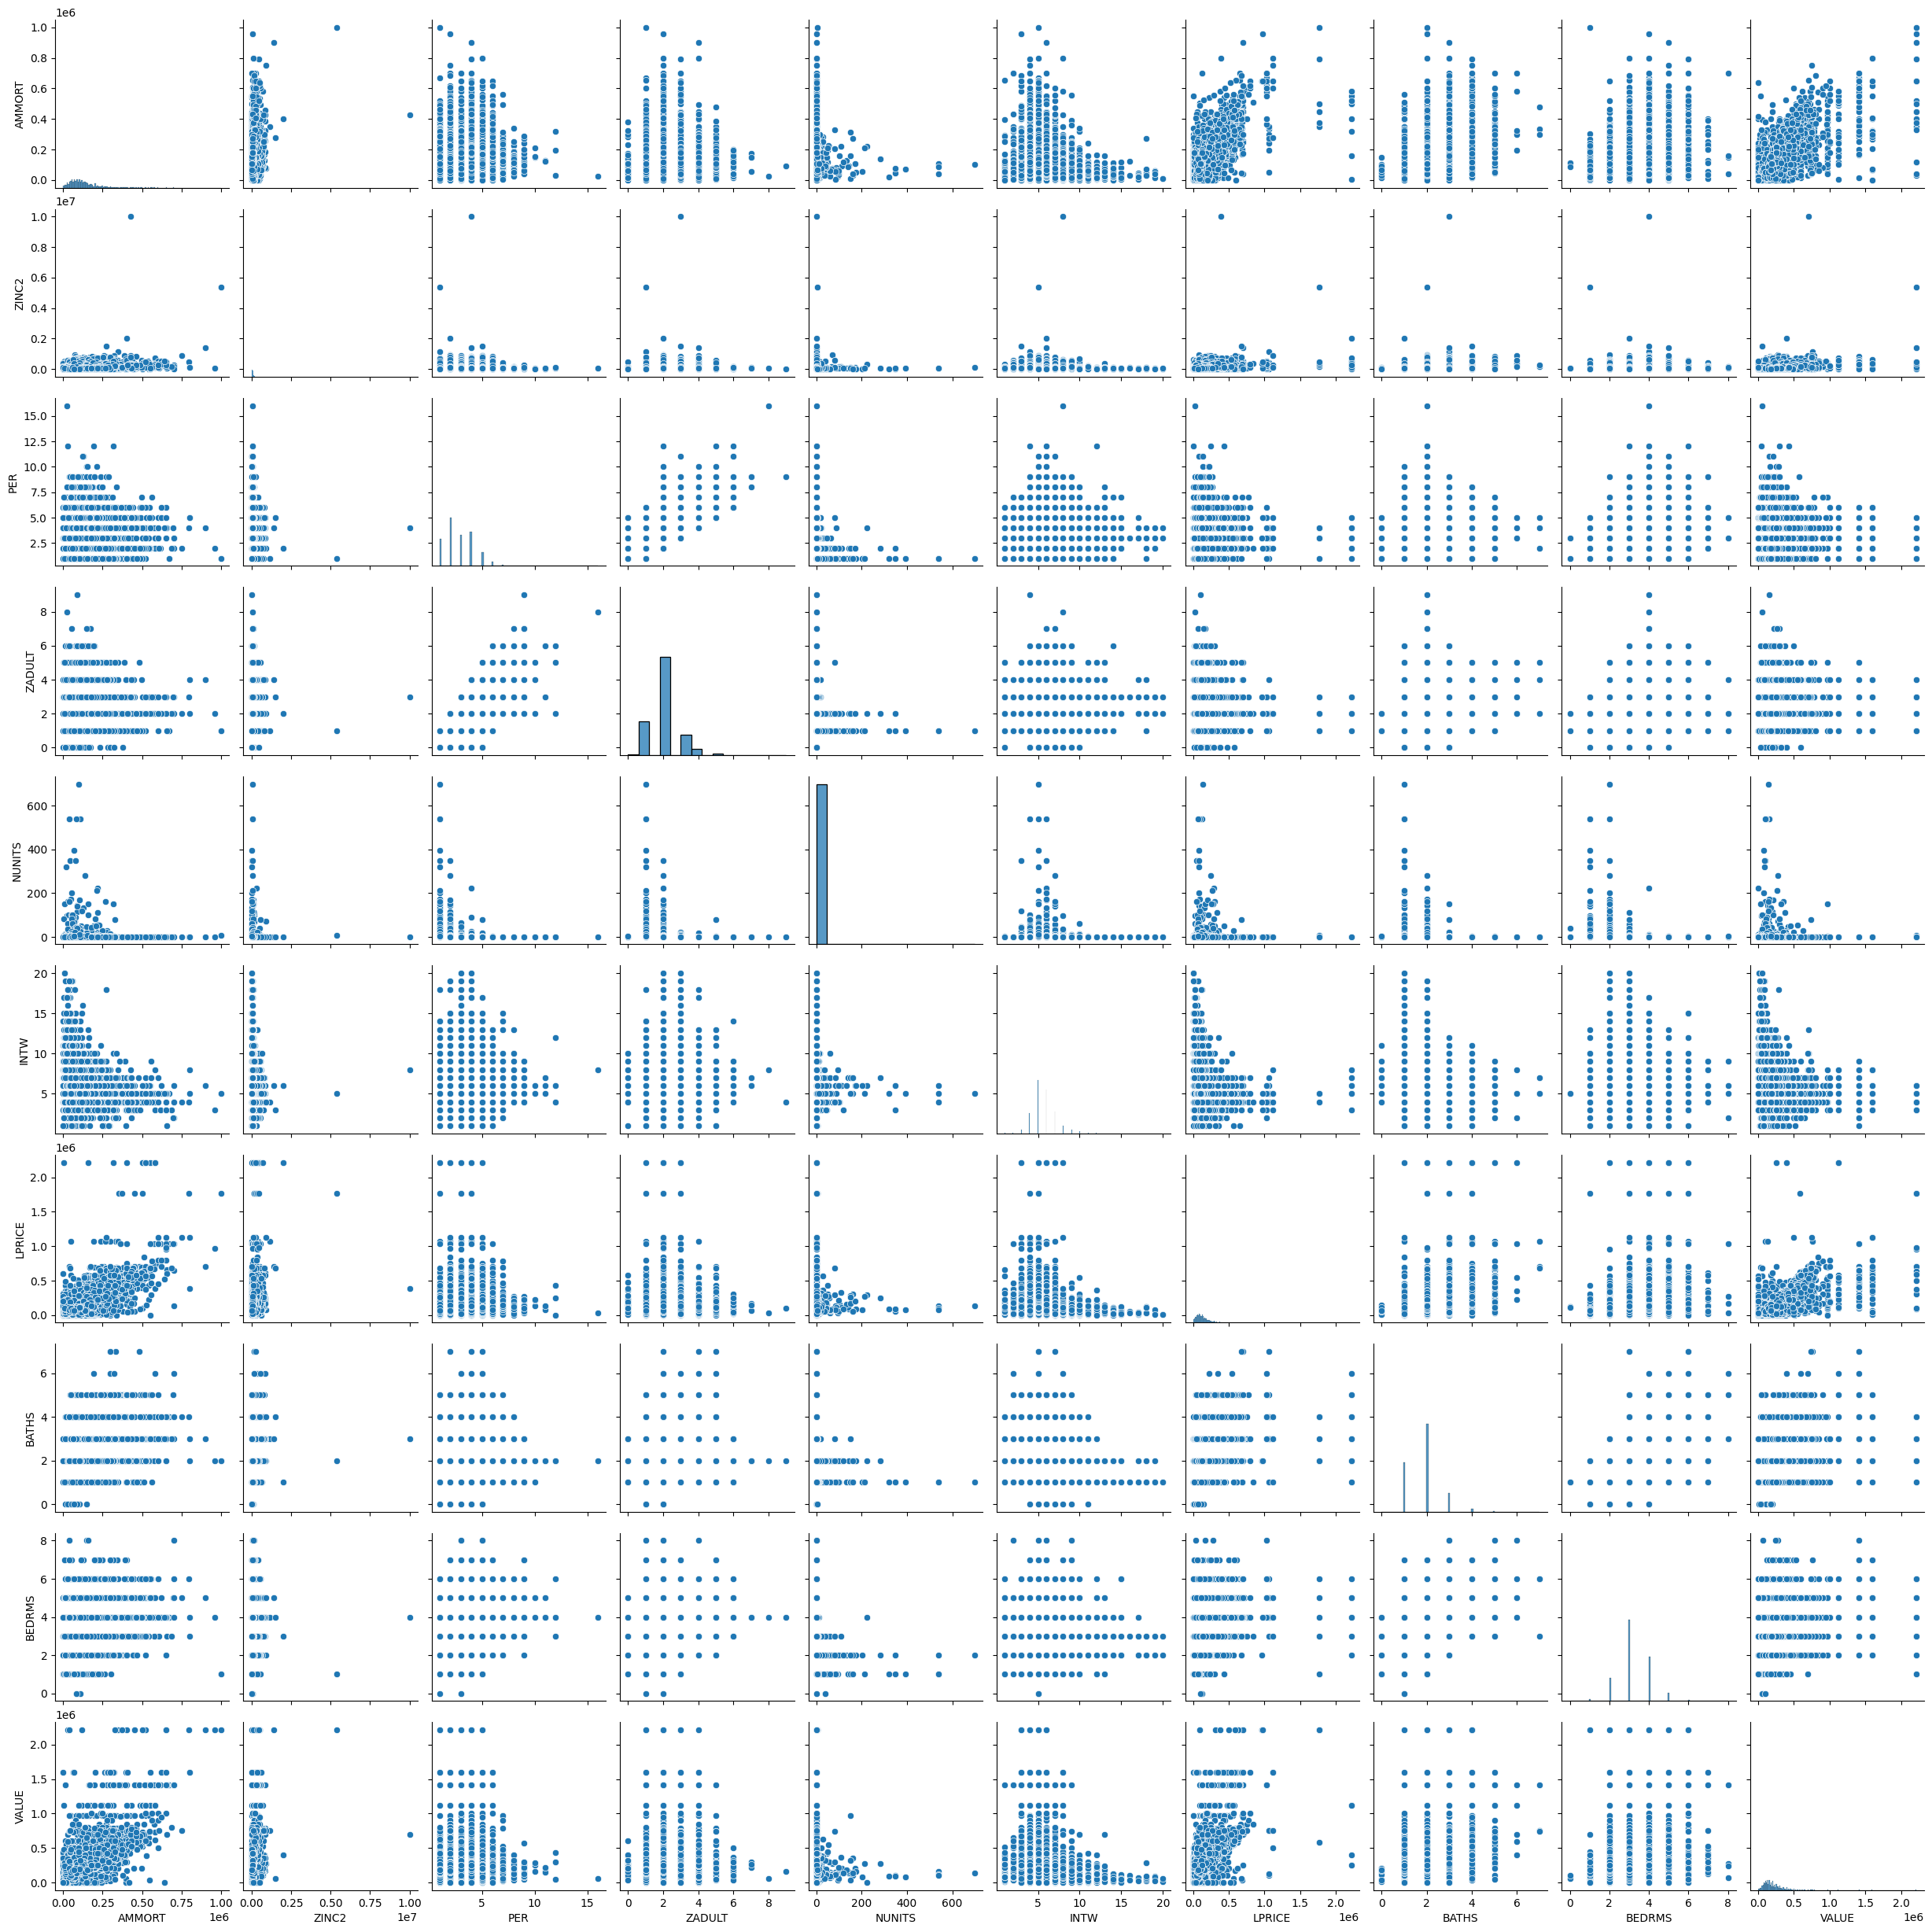

In [528]:
homes_data = load_data('/homes2004')
homes = pd.DataFrame(homes_data)
sns.pairplot(homes)


In [529]:
np.unique(homes['STATE'])

array(['CA', 'CO', 'CT', 'GA', 'IL', 'IN', 'LA', 'MO', 'OH', 'OK', 'PA',
       'TX', 'WA'], dtype=object)

#Some relationships I noted as rather apparent were Ammort as a function of value, amort as a function of the interest rate charged on first mortgage, Value of unit as a function of purchase price of unit and land, Ammort as a function of land and unit value.

#:2. Regress log value onto all but mortgage and purchase $.

In [530]:
columns_to_dummy = ['EAPTBL', 'ECOM1', 'ECOM2', 'EGREEN', 'EJUNK', 'ELOW1',
                   'ESFD', 'ETRANS', 'EABAN', 'HOWH','HOWH', 'ODORA', 'STRNA',
                   'HHGRAD', 'METRO', 'MATBUY', 'FRSTHO','STATE', 'DWNPAY']

dummy_df = pd.get_dummies(homes[columns_to_dummy], prefix=columns_to_dummy, drop_first=True)
homes_dummy = pd.concat([homes, dummy_df], axis=1)


homes_dummy.head()




AMMORT EAPTBL ECOM1 ECOM2 EGREEN EJUNK ELOW1 ESFD ETRANS EABAN  ...  \
0   50000      N     N     N      Y     N     N    Y      N     N  ...   
1   70000      N     N     N      N     N     N    Y      N     N  ...   
2  117000      N     N     N      N     N     N    Y      N     N  ...   
3  100000      N     N     N      N     N     Y    Y      N     N  ...   
4  100000      N     Y     N      Y     N     N    Y      N     N  ...   

  STATE_IL STATE_IN STATE_LA STATE_MO  STATE_OH  STATE_OK  STATE_PA STATE_TX  \
0    False    False    False    False     False     False     False    False   
1    False    False    False    False     False     False     False    False   
2    False    False    False    False     False     False     False    False   
3    False    False    False    False     False     False     False    False   
4    False    False    False    False     False     False     False    False   

   STATE_WA  DWNPAY_prev home  
0     False             False  
1     False             False  
2     False             False  
3     False              True  
4     False             False  

[5 rows x 62 columns]

In [531]:
binary_cols = [ 'EAPTBL','ECOM1','EJUNK','ECOM2','EGREEN','ELOW1', 'ESFD', 'ETRANS', 'EABAN', 'ODORA', 'STRNA','FRSTHO','MATBUY']
for col in binary_cols:
    homes_dummy[col] = homes_dummy[col].map({'N': 0, 'Y': 1})

state_dummy_cols = [col for col in homes_dummy.columns if col.startswith('STATE_')]
for col in state_dummy_cols:
    homes_dummy[col] = homes_dummy[col]*1

dwnpay_dummy_cols= [col for col in homes_dummy.columns if col.startswith('DWNPAY_')]
for col in dwnpay_dummy_cols:
    homes_dummy[col] = homes_dummy[col]*1

school_dummy = ['HHGRAD']
for col in school_dummy:
    homes_dummy[col] = homes_dummy[col].map({'No HS': 0, 'HS Grad': 1, 'Assoc': 2, 'Bach' : 3, 'Grad': 4})

HOW_dummy_cols = [ 'HOWH', 'HOWN']
for col in HOW_dummy_cols:
    homes_dummy[col] = homes_dummy[col].map({'good': 1, 'bad': 0})

metro_dummy_cols = [col for col in homes_dummy.columns if col.startswith('METRO')]
for col in metro_dummy_cols:
    homes_dummy[col] = homes_dummy[col]*1

homes_dummy.head()



AMMORT  EAPTBL  ECOM1  ECOM2  EGREEN  EJUNK  ELOW1  ESFD  ETRANS  EABAN  \
0   50000       0      0      0       1      0      0     1       0      0   
1   70000       0      0      0       0      0      0     1       0      0   
2  117000       0      0      0       0      0      0     1       0      0   
3  100000       0      0      0       0      0      1     1       0      0   
4  100000       0      1      0       1      0      0     1       0      0   

   ...  STATE_IL  STATE_IN  STATE_LA  STATE_MO  STATE_OH  STATE_OK  STATE_PA  \
0  ...         0         0         0         0         0         0         0   
1  ...         0         0         0         0         0         0         0   
2  ...         0         0         0         0         0         0         0   
3  ...         0         0         0         0         0         0         0   
4  ...         0         0         0         0         0         0         0   

   STATE_TX  STATE_WA  DWNPAY_prev home  
0         0         0                 0  
1         0         0                 0  
2         0         0                 0  
3         0         0                 1  
4         0         0                 0  

[5 rows x 62 columns]

In [532]:
columns_to_drop = ['METRO', 'STATE','DWNPAY','EAPTBL_Y','ECOM1_Y', 'ECOM2_Y', 'EGREEN_Y', 'EJUNK_Y', 'ELOW1_Y', 'ESFD_Y', 'ETRANS_Y', 'EABAN_Y', 'HOWH_good', 'ODORA_Y','STRNA_Y', 'HHGRAD_Bach', 'HHGRAD_Grad', 'HHGRAD_HS Grad', 'HHGRAD_No HS', 'MATBUY_Y','FRSTHO_Y' ]
for col in columns_to_drop:
    homes_dummy.drop(columns=col, inplace=True)


In [533]:
homes_dummy.to_csv('homes_dummy.csv', index=False)
from google.colab import files

files.download('homes_dummy.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [534]:
homes_dummy = homes_dummy.rename(columns={'DWNPAY_prev home': 'DWNPAY_prev_home'})


In [535]:
homes_dummy['log_VALUE'] = np.log(homes_dummy['VALUE'])
formula = 'log_VALUE ~ ' + ' + '.join([col for col in homes_dummy.columns if col not in ['AMMORT', 'LPRICE', 'VALUE','log_VALUE']])
model = smf.ols(formula, data=homes_dummy).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_VALUE   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     184.2
Date:                Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                        04:15:44   Log-Likelihood:                -18924.
No. Observations:               15565   AIC:                         3.792e+04
Df Residuals:                   15527   BIC:                         3.822e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           11.4344      0.060  

In [536]:
sum(np.array(model.pvalues) < .10)

32

#from the data table we can see that 32 coefficients were statistically significant at 10%

In [537]:
indexer = (np.array(model.pvalues) < .10)
indexer = indexer[1:]
pred = [col for col in homes_dummy.columns if col not in ['AMMORT', 'LPRICE', 'VALUE','log_VALUE']]
np.array(pred)[indexer]

array(['EAPTBL', 'ECOM2', 'EJUNK', 'ESFD', 'EABAN', 'HOWH', 'HOWN',
       'STRNA', 'ZINC2', 'ZADULT', 'HHGRAD', 'NUNITS', 'INTW', 'BATHS',
       'BEDRMS', 'MATBUY', 'FRSTHO', 'METRO_urban', 'STATE_CO',
       'STATE_CT', 'STATE_GA', 'STATE_IL', 'STATE_IN', 'STATE_LA',
       'STATE_MO', 'STATE_OH', 'STATE_OK', 'STATE_PA', 'STATE_TX',
       'STATE_WA', 'DWNPAY_prev_home'], dtype='<U16')

#The significant covariates are EAPTBL', 'ECOM2', 'EJUNK', 'ESFD', 'EABAN', 'HOWH', 'HOWN', 'STRNA', 'ZINC2', 'ZADULT', 'HHGRAD', 'NUNITS', 'INTW', 'BATHS','BEDRMS', 'MATBUY', 'FRSTHO', 'METRO_urban', 'STATE_CO', 'STATE_CT', 'STATE_GA', 'STATE_IL', 'STATE_IN', 'STATE_LA', 'STATE_MO', 'STATE_OH', 'STATE_OK', 'STATE_PA', 'STATE_TX', 'STATE_WA', 'DWNPAY_prev_home'

#3 - Fit a regression for whether the buyer had ≥ 20% down (again, onto everything but AMMORT and LPRICE).


In [538]:
homes_dummy['twentydownpct'] = 0
homes_dummy.loc[((homes_dummy['LPRICE'] - homes_dummy['AMMORT'])/ homes_dummy['AMMORT']) >= 0.2, 'twentydownpct'] = 1

formula = 'twentydownpct ~ ' + ' + '.join([col for col in homes_dummy.columns if col not in ['AMMORT', 'LPRICE','twentydownpct']])
model = smf.ols(formula, data=homes_dummy).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          twentydownpct   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     62.11
Date:                Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                        04:15:44   Log-Likelihood:                -9466.1
No. Observations:               15565   AIC:                         1.901e+04
Df Residuals:                   15525   BIC:                         1.932e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2986      0.064  

#Fit a regression for whether the buyer had ≥ 20% down (again, onto everything but AMMORT and LPRICE)

#From the data we can see that there is not a strong relation between the predictors and outcome from the R^2 as well as Pvalues for many of the variables being above 10%. A first home buyer is 7.27 percentage points less likely than someone who is not a first home buyer. but for every increase in the number of bathrooms they are 4.73 percentage points more likely to put 20% down.


#Add + describe interaction for 1st home-buyers and baths.

In [539]:
homes_dummy['FRSTHO_BATHS'] = homes_dummy['FRSTHO'] * homes_dummy['BATHS']
formula = 'twentydownpct ~ ' + ' + '.join([col for col in homes_dummy.columns if col not in ['AMMORT', 'LPRICE','twentydownpct']])
model = smf.ols(formula, data=homes_dummy).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          twentydownpct   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     60.92
Date:                Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                        04:15:44   Log-Likelihood:                -9459.6
No. Observations:               15565   AIC:                         1.900e+04
Df Residuals:                   15524   BIC:                         1.932e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2722      0.065  

Given that the buyer is a first time home buyer, for every increase in the number of bath rooms they are 0.0004 percentage points less like to put 20% down

#4 - Re-fit your model from Q3 for only homes worth > 100k. Compare in-sample fit to R2 for predicting homes worth < 100k. 2


In [540]:
hundredkfilter = homes_dummy[homes_dummy['VALUE'] > 100000]
formula = 'twentydownpct ~ ' + ' + '.join([col for col in homes_dummy.columns if col not in ['AMMORT', 'LPRICE','twentydownpct']])
model = smf.ols(formula, data=hundredkfilter).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          twentydownpct   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     52.27
Date:                Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                        04:15:45   Log-Likelihood:                -7515.7
No. Observations:               12144   AIC:                         1.511e+04
Df Residuals:                   12103   BIC:                         1.542e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.8722      0.273  

In [541]:
underhundredkfilter = homes_dummy[homes_dummy['VALUE'] < 100000]
formula = 'twentydownpct ~ ' + ' + '.join([col for col in homes_dummy.columns if col not in ['AMMORT', 'LPRICE','twentydownpct']])
model = smf.ols(formula, data=underhundredkfilter).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          twentydownpct   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     7.787
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           3.00e-41
Time:                        04:15:45   Log-Likelihood:                -1577.9
No. Observations:                3088   AIC:                             3238.
Df Residuals:                    3047   BIC:                             3485.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5556      0.110  